In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


2025-04-14 10:15:44.457924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744625744.664822      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744625744.721749      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Using GPU:", tf.test.gpu_device_name())


Num GPUs Available: 1
Using GPU: /device:GPU:0


I0000 00:00:1744625756.567763      31 gpu_device.cc:2022] Created device /device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [3]:
dataset_path = "/kaggle/input/emotion-detection-fer"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")


In [4]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10
SEED = 42

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    seed=SEED
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    seed=SEED
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
base_model = tf.keras.applications.DenseNet169(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


I0000 00:00:1744625771.981296      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744625803.340934     109 service.cc:148] XLA service 0x7b4de4003b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744625803.341753     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744625807.030157     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/718 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.1875 - loss: 2.2445   

I0000 00:00:1744625821.925776     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


718/718 ━━━━━━━━━━━━━━━━━━━━ 208s 227ms/step - accuracy: 0.3726 - loss: 1.6396 - val_accuracy: 0.4694 - val_loss: 1.3956
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.4642 - loss: 1.4060 - val_accuracy: 0.4989 - val_loss: 1.3317
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.4943 - loss: 1.3366 - val_accuracy: 0.5024 - val_loss: 1.3237
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.5134 - loss: 1.2913 - val_accuracy: 0.5126 - val_loss: 1.2907
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.5109 - loss: 1.2850 - val_accuracy: 0.5121 - val_loss: 1.2973
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.5202 - loss: 1.2676 - val_accuracy: 0.5137 - val_loss: 1.2867
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.5331 - loss: 1.2433 - val_accuracy: 0.5095 - val_loss: 1.2986
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.5359 - loss: 1.2274 - val_accur

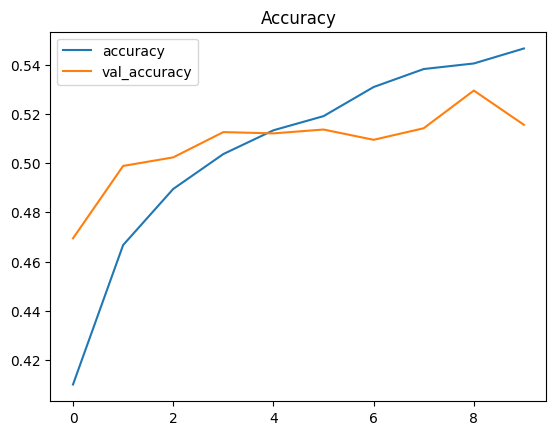

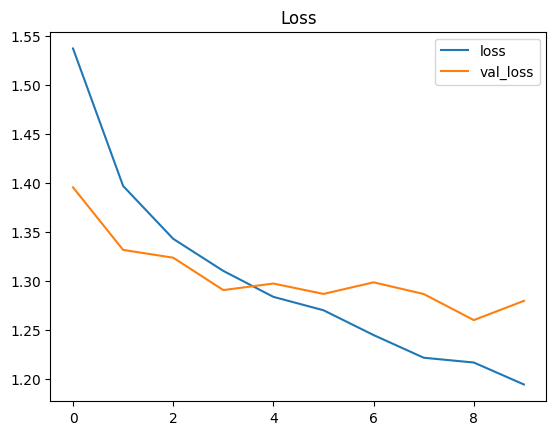

In [7]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()


In [8]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")


  2/225 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.3750 - loss: 1.6851 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 216ms/step - accuracy: 0.4329 - loss: 1.4671
Test Accuracy: 0.5157


In [9]:
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob, axis=1)

y_true = test_generator.classes

labels = list(test_generator.class_indices.keys())


225/225 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step


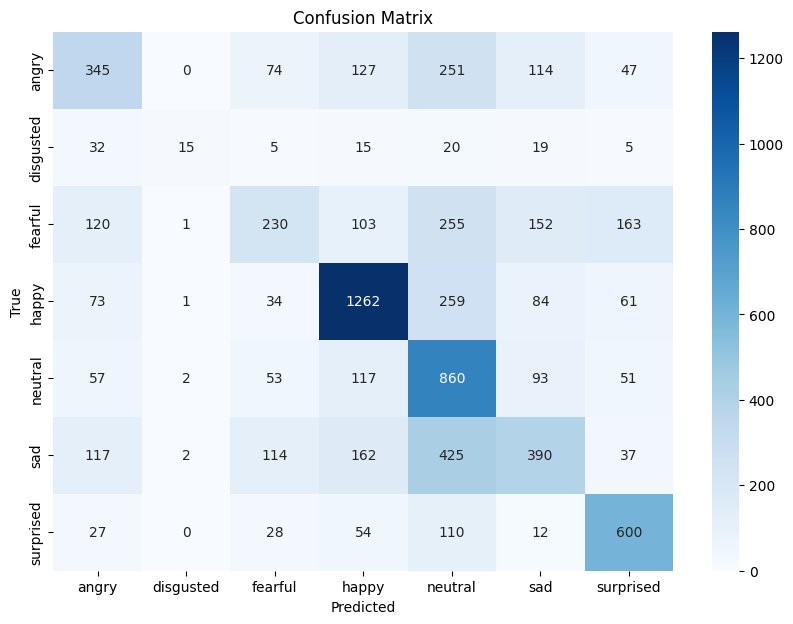

In [10]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=labels))


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step
              precision    recall  f1-score   support

       angry       0.45      0.36      0.40       958
   disgusted       0.71      0.14      0.23       111
     fearful       0.43      0.22      0.29      1024
       happy       0.69      0.71      0.70      1774
     neutral       0.39      0.70      0.50      1233
         sad       0.45      0.31      0.37      1247
   surprised       0.62      0.72      0.67       831

    accuracy                           0.52      7178
   macro avg       0.53      0.45      0.45      7178
weighted avg       0.52      0.52      0.50      7178



225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step


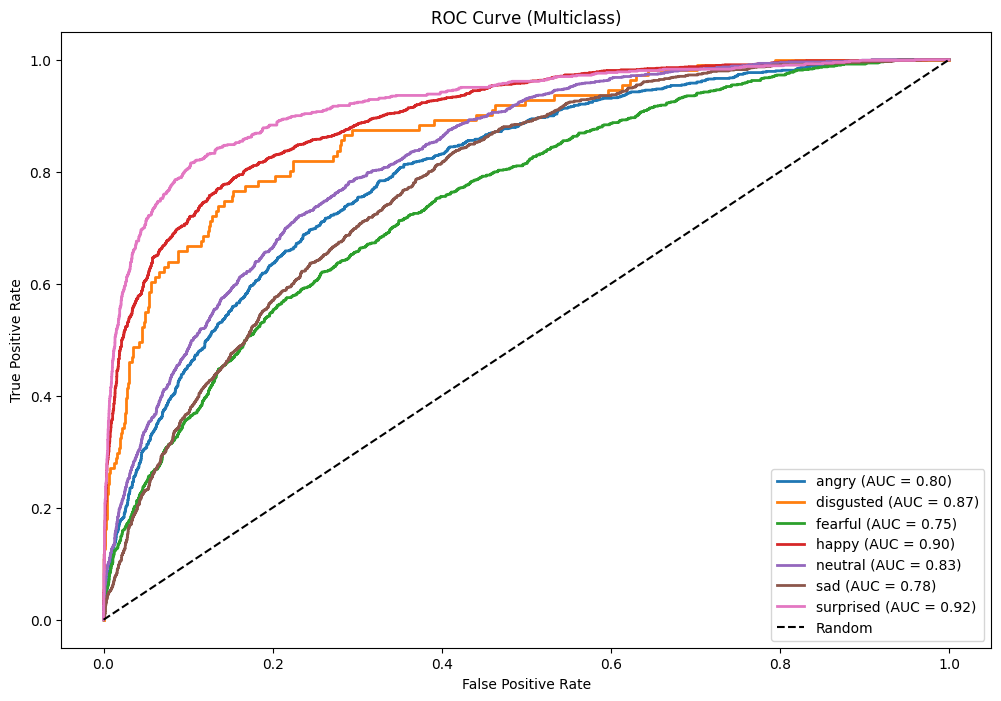

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(test_generator)
y_true_bin = label_binarize(y_true, classes=range(len(labels)))

plt.figure(figsize=(12, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)

avg_confidence = np.mean(np.max(y_prob, axis=1))

print(f"Model Accuracy     : {accuracy:.4f}")
print(f"Average Confidence : {avg_confidence:.4f}")


Model Accuracy     : 0.5157
Average Confidence : 0.5424


In [14]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=0)

metrics_df = pd.DataFrame({
    "Class": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
})
display(metrics_df)


,Class,Precision,Recall,F1-score
0,angry,0.447471,0.360125,0.399075
1,disgusted,0.714286,0.135135,0.227273
2,fearful,0.427509,0.224609,0.294494
3,happy,0.685870,0.711387,0.698395
4,neutral,0.394495,0.697486,0.503955
5,sad,0.451389,0.312751,0.369493
6,surprised,0.622407,0.722022,0.668524


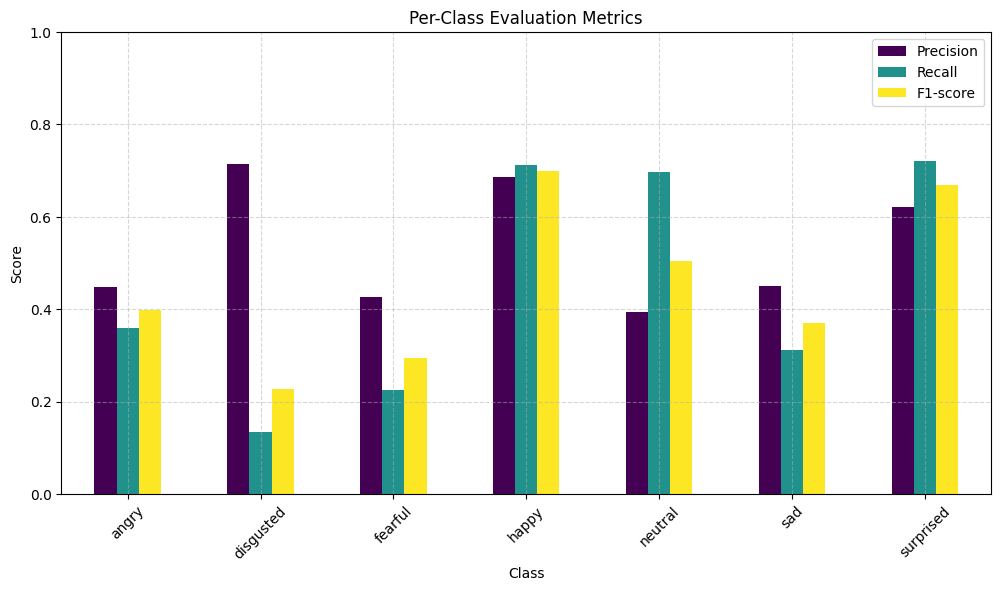

In [15]:
metrics_df.set_index("Class")[["Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(12, 6), colormap="viridis", ylim=(0, 1))
plt.title("Per-Class Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

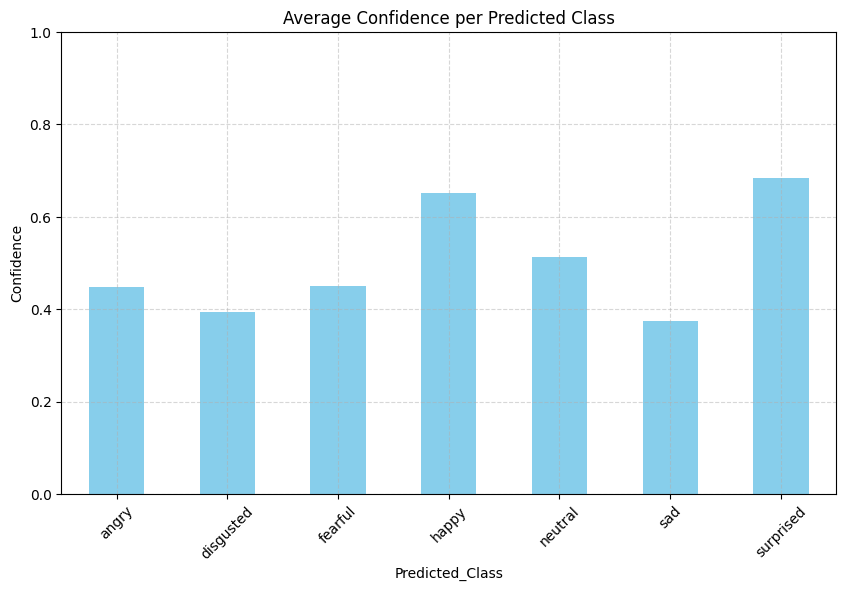

In [16]:
confidences = np.max(y_prob, axis=1)
class_conf_df = pd.DataFrame({
    "Predicted_Class": [labels[i] for i in y_pred],
    "Confidence": confidences
})
avg_conf_by_class = class_conf_df.groupby("Predicted_Class").mean()

avg_conf_by_class.plot(kind="bar", legend=False, figsize=(10, 6), color="skyblue")
plt.title("Average Confidence per Predicted Class")
plt.ylabel("Confidence")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [17]:
model.save("submission_model.h5")
print("Model saved.")


Model saved.


In [18]:
metrics_df.to_csv("/kaggle/working/classification_metrics.csv", index=False)
print("Saved classification_metrics.csv")

Saved classification_metrics.csv


Saved confusion_matrix.png


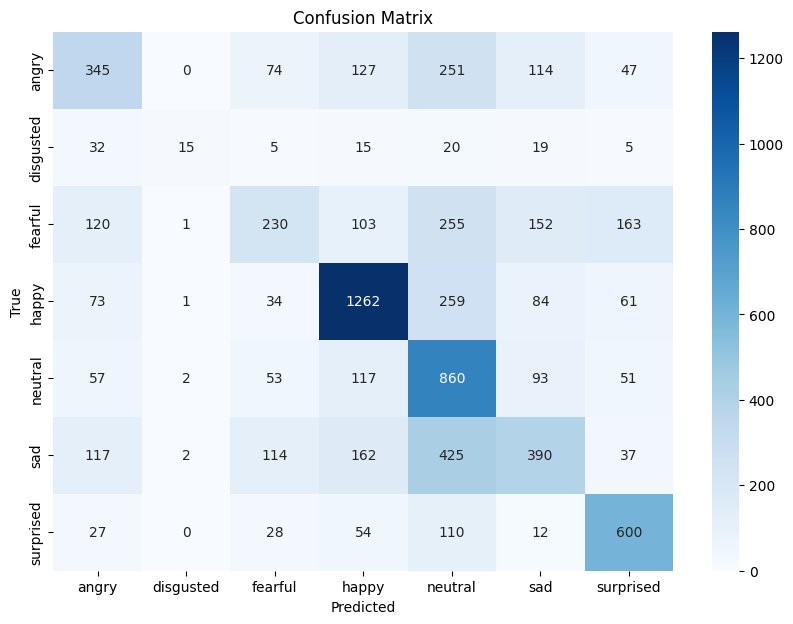

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.savefig("/kaggle/working/confusion_matrix.png")
print("Saved confusion_matrix.png")


In [20]:
import zipfile

zip_filename = '/kaggle/working/submission_model.zip'

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('/kaggle/working/submission_model.h5', 'submission_model.h5')

print(f"Model has been zipped as {zip_filename}")


Model has been zipped as /kaggle/working/submission_model.zip
